In [1]:
# Test detection of cavities

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from icedyn1d.mesh import Mesh

In [3]:
def plot_moved_nodes(xo, xn, include):
    ninds = np.arange(len(xn), dtype=int)
    plt.plot(xn, ninds, '-or', label='old')
    plt.plot(xo, ninds, '-.k', label='new')

    n_inc = np.zeros_like(xn, dtype=bool)
    n_inc[:-1][include] = True
    n_inc[1:][include] = True
    plt.plot(xn[n_inc], ninds[n_inc], ':^b', label='cavity')
    plt.legend()

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0.  1.  2.  3.  2.5 5.  6.  7.  8.  9. ]
[ 1.   1.   1.  -0.5  2.5  1.   1.   1.   1. ]
[False False  True  True  True False False False False]


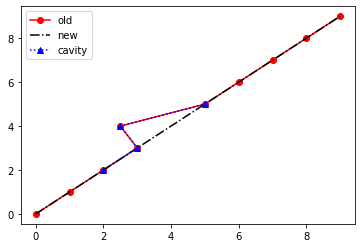

In [4]:
x = np.arange(10, dtype=float)
m = Mesh(x)
um = np.zeros_like(x)
um[4]=-1.5
m.move(um)
print(x, m.nodes_x, sep='\n')
jac = m.get_jacobian()
print(jac)

include = m.detect_flipped_cavities()
print(include)
plot_moved_nodes(x, m.nodes_x, include)

[0.  1.  2.  3.  6.2 5.  6.  7.  8.  9. ]
[ 1.   1.   1.   3.2 -1.2  1.   1.   1.   1. ]
[False False False  True  True  True  True False False]


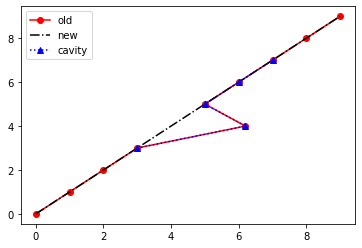

In [5]:
x = np.arange(10, dtype=float)
m = Mesh(x)
um = np.zeros_like(x)
um[4]=2.2
m.move(um)
print(m.nodes_x)
jac = m.get_jacobian()
print(jac)

include = m.detect_flipped_cavities()
print(include)
plot_moved_nodes(x, m.nodes_x, include)

[0.  1.  2.  3.  1.5 5.  6.  7.  8.  9. ]
[ 1.   1.   1.  -1.5  3.5  1.   1.   1.   1. ]
[False  True  True  True  True False False False False]


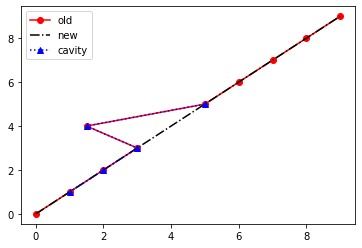

In [6]:
x = np.arange(10, dtype=float)
m = Mesh(x)
um = np.zeros_like(x)
um[4]=-2.5
m.move(um)
print(m.nodes_x)
jac = m.get_jacobian()
inds = np.arange(len(x)-1, dtype=int)
print(jac)

include = m.detect_flipped_cavities()
print(include)
plot_moved_nodes(x, m.nodes_x, include)